In [1]:
%run libs/pump_unit.ipynb

In [9]:
files = ['data/pump.csv',
         'data/pump.csv',
         'data/pump.csv',
         'data/pump.csv']

In [15]:
flow_step=10.0
head_step=0.2

In [16]:
pb_1 = PumpBattery(flow_step, head_step, files)
pb.calc_units_matrices()

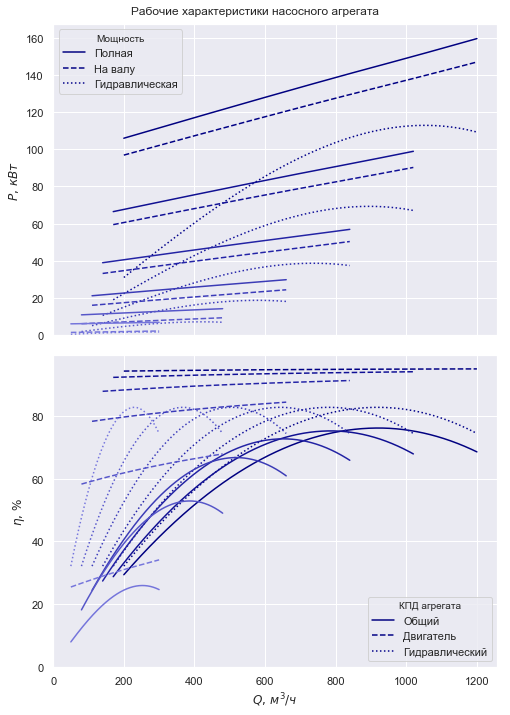

In [17]:
pb.units[0].plot_work_curves()

In [18]:
scenario = 0

pb.calc_mutation_matrix(scenario)

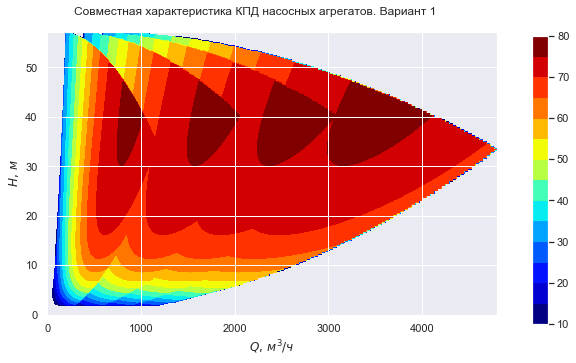

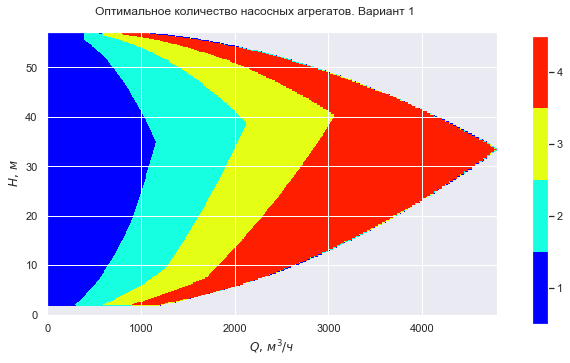

In [19]:
pb.plot_eff_total_map(scenario)
pb.plot_count_total_map(scenario)

In [127]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [128]:
# конвертер величин

def convert_unit(kind, value, unit_in, unit_out):
    unit = {
        'head': {'m':1.0, 'kgf_cm2':10.0, 'bar':10.197, 'kPa':0.10197, 'atm':10.33, 'psi':0.70307},
        'flow': {'cbmh':1.0, 'cbms':3600.0, 'lpm':0.06, 'lps':3.6},
        'power': {'kW':1.0, 'W':0.001}
    }
    return value * unit[kind][unit_in] / unit[kind][unit_out]

In [129]:
# читаем показания

log_1 = pd.read_csv('data/log_06_04_2019.csv', sep=';', decimal=',')
log_1["date"] = pd.to_datetime(log_1["date"], format="%d.%m.%Y %H:%M")
log_1.fillna(0, inplace=True)

log_2 = pd.read_csv('data/log_21_04_2019.csv', sep=';', decimal=',')
log_2["date"] = pd.to_datetime(log_2["date"], format="%d.%m.%Y %H:%M")
log_2.fillna(method ='ffill', inplace=True)

In [130]:
# преобразуем показания давления

pressure_cols = ['Pin', 'Pout', 'Pin1', 'Pout1', 'Pin2', 'Pout2']
for col in pressure_cols:
    log_1[col] = log_1[col].apply(lambda x: convert_unit('head', x, 'bar', 'm'))
    log_2[col] = log_2[col].apply(lambda x: convert_unit('head', x, 'bar', 'm'))

In [131]:
# объединяем 2 файла

#frames = [log_1, log_2]
#log = pd.concat(frames, ignore_index=True)

In [132]:
log_1.head()

,date,Q,Pout,Pin,Pin1,Pout1,N_1,f_1,U_1,I_1,...,U_5,I_5,N_6,f_6,U_6,I_6,N_6.1,f_6.1,U_6.1,I_6.1
0,2019-04-06 01:00:00,1420.0,78.5169,35.6895,35.6895,59.1426,128,40,380,240,...,0,0,128,40,380,240,0,0,0,0
1,2019-04-06 02:00:00,1420.0,78.5169,35.6895,35.6895,59.1426,128,40,380,240,...,0,0,128,40,380,240,0,0,0,0
2,2019-04-06 03:00:00,1460.0,78.5169,32.6304,32.6304,59.1426,135,43,380,260,...,0,0,135,43,380,260,0,0,0,0
3,2019-04-06 04:00:00,1460.0,78.5169,32.6304,32.6304,59.1426,135,43,380,260,...,0,0,135,43,380,260,0,0,0,0
4,2019-04-06 05:00:00,1500.0,78.5169,34.6698,34.6698,59.1426,130,42,380,250,...,0,0,130,42,380,250,0,0,0,0


In [133]:
log_2.head()

,date,Q,Pout,Pin,Pin1,Pout1,N_1,f_1,U_1,I_1,...,U_5,I_5,N_6,f_6,U_6,I_6,N_6.1,f_6.1,U_6.1,I_6.1
0,2019-04-21 12:00:00,1220.0,77.4972,35.6895,33.6501,60.1623,60.0,36.0,380.0,158.0,...,0.0,0.0,85.0,41.0,380.0,195.0,0.0,0.0,0.0,0.0
1,2019-04-21 13:00:00,1150.0,77.4972,37.7289,37.7289,61.1820,51.0,34.6,380.0,150.0,...,0.0,0.0,90.0,40.0,380.0,190.0,0.0,0.0,0.0,0.0
2,2019-04-21 14:00:00,1170.0,76.4775,34.6698,31.6107,61.1820,65.0,38.4,380.0,165.0,...,0.0,0.0,75.0,40.0,380.0,175.0,0.0,0.0,0.0,0.0
3,2019-04-21 15:00:00,1120.0,76.4775,37.7289,36.7092,62.2017,55.0,36.7,380.0,155.0,...,0.0,0.0,73.0,39.0,380.0,175.0,0.0,0.0,0.0,0.0
4,2019-04-21 16:00:00,1115.0,77.4972,30.5910,29.5713,61.1820,72.0,40.0,380.0,175.0,...,0.0,0.0,80.0,40.0,380.0,180.0,0.0,0.0,0.0,0.0


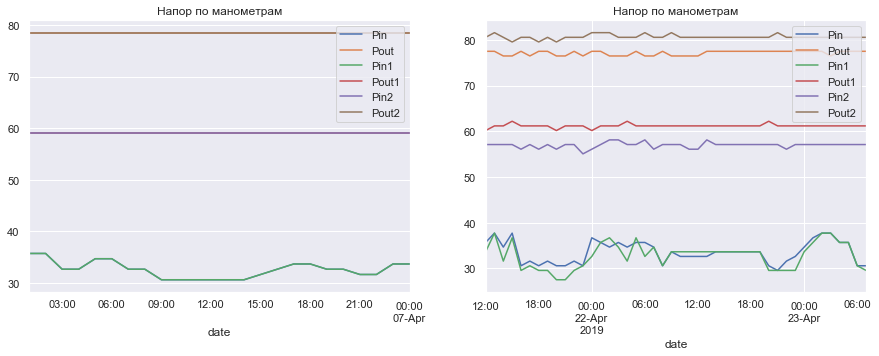

In [174]:
fig, axes = plt.subplots(nrows=1, ncols=2)

log_1.plot('date', pressure_cols, figsize=(15, 5), title='Напор по манометрам', ax=axes[0])
log_2.plot('date', pressure_cols, figsize=(15, 5), title='Напор по манометрам', ax=axes[1])

In [135]:
# корректировка на высоту установки датчиков

Pin_height = 2.0
Pout_height = 2.0

PinN_height = 3.1
PoutN_height = 3.8

log_1['Pin_adj'] = log_1['Pin'] - Pin_height
log_2['Pin_adj'] = log_2['Pin'] - Pin_height

log_1['Pout_adj'] = log_1['Pout'] - Pout_height
log_2['Pout_adj'] = log_2['Pout'] - Pout_height

log_1[['Pin_adj1', 'Pin_adj2']] = log_1[['Pin1', 'Pin2']] - PinN_height
log_2[['Pin_adj1', 'Pin_adj2']] = log_2[['Pin1', 'Pin2']] - PinN_height

log_1[['Pout_adj1', 'Pout_adj2']] = log_1[['Pout1', 'Pout2']] - PoutN_height
log_2[['Pout_adj1', 'Pout_adj2']] = log_2[['Pout1', 'Pout2']] - PoutN_height

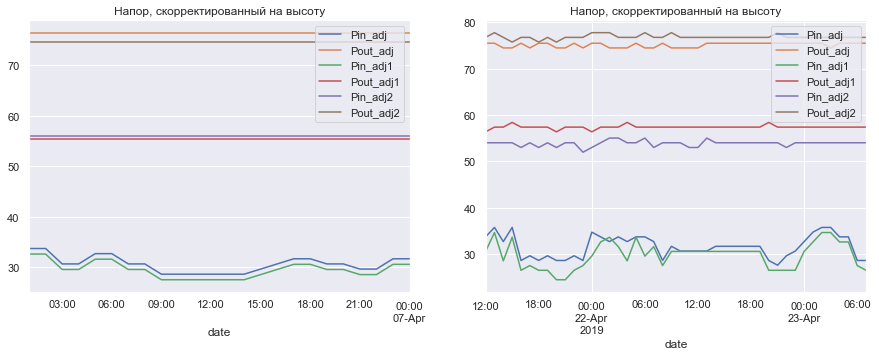

In [176]:
pressure_adj_cols = ['Pin_adj', 'Pout_adj', 'Pin_adj1', 'Pout_adj1', 'Pin_adj2', 'Pout_adj2']

fig, axes = plt.subplots(nrows=1, ncols=2)
log_1.plot('date', pressure_adj_cols, figsize=(15, 5), title='Напор, скорректированный на высоту', ax=axes[0])
log_2.plot('date', pressure_adj_cols, figsize=(15, 5), title='Напор, скорректированный на высоту', ax=axes[1])

In [138]:
log_1['P_lift1'] = log_1['Pout_adj1'] - log_1['Pin_adj1']
log_1['P_lift2'] = log_1['Pout_adj2'] - log_1['Pin_adj2']

log_2['P_lift1'] = log_2['Pout_adj1'] - log_2['Pin_adj1']
log_2['P_lift2'] = log_2['Pout_adj2'] - log_2['Pin_adj2']

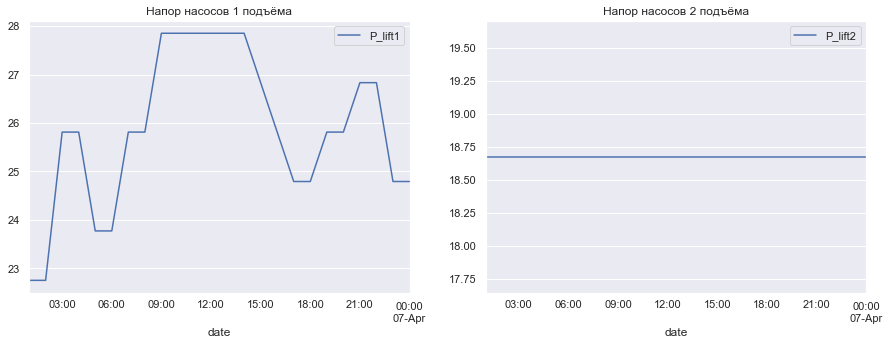

In [177]:
fig, axes = plt.subplots(nrows=1, ncols=2)

log_1.plot('date', 'P_lift1', figsize=(15, 5), title='Напор насосов 1 подъёма', ax=axes[0])
log_1.plot('date', 'P_lift2', figsize=(15, 5), title='Напор насосов 2 подъёма', ax=axes[1])

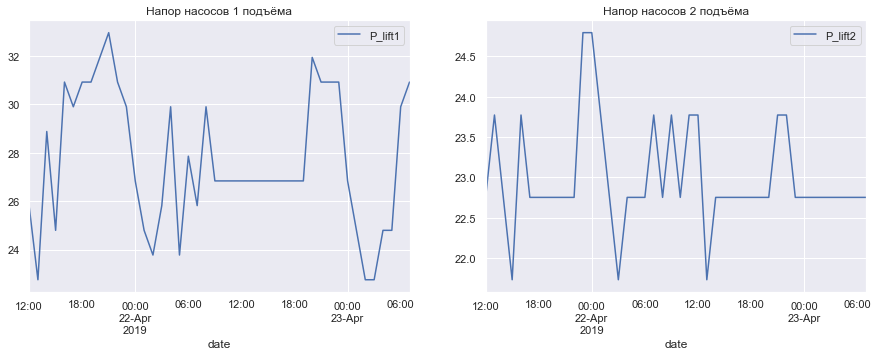

In [178]:
fig, axes = plt.subplots(nrows=1, ncols=2)

log_2.plot('date', 'P_lift1', figsize=(15, 5), title='Напор насосов 1 подъёма', ax=axes[0])
log_2.plot('date', 'P_lift2', figsize=(15, 5), title='Напор насосов 2 подъёма', ax=axes[1])

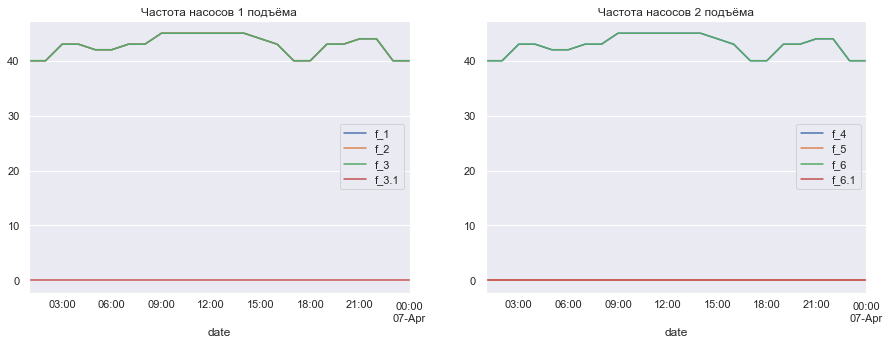

In [180]:
freq_cols_1 = ['f_1', 'f_2', 'f_3', 'f_3.1']
freq_cols_2 = ['f_4', 'f_5', 'f_6', 'f_6.1']

fig, axes = plt.subplots(nrows=1, ncols=2)

log_1.plot('date', freq_cols_1, figsize=(15, 5), title='Частота насосов 1 подъёма', ax=axes[0])
log_1.plot('date', freq_cols_2, figsize=(15, 5), title='Частота насосов 2 подъёма', ax=axes[1])

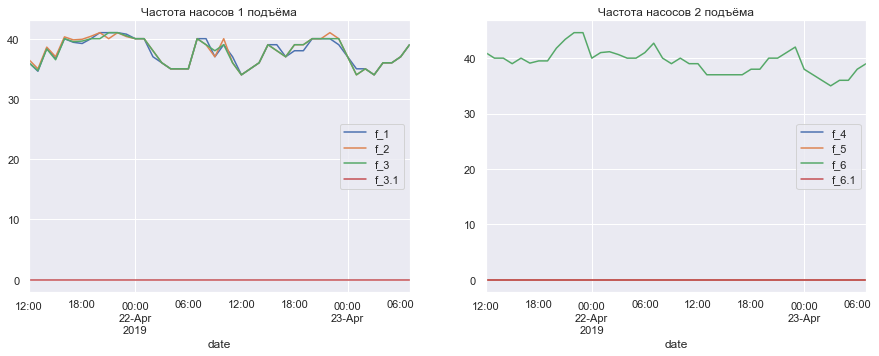

In [181]:
fig, axes = plt.subplots(nrows=1, ncols=2)

log_2.plot('date', freq_cols_1, figsize=(15, 5), title='Частота насосов 1 подъёма', ax=axes[0])
log_2.plot('date', freq_cols_2, figsize=(15, 5), title='Частота насосов 2 подъёма', ax=axes[1])

In [ ]:
lift_cols_1 = ['Pin1', 'Pout1', 'N_1', 'f_1', 'U_1', 'I_1', 'N_2', 'f_2', 'U_2', 'I_2',
               'N_3', 'f_3', 'U_3', 'I_3', 'N_3.1', 'f_3.1', 'U_3.1', 'I_3.1']
lift_cols_2 = ['Pin2', 'Pout2', 'N_4', 'f_4', 'U_4', 'I_4', 'N_5', 'f_5', 'U_5', 'I_5',
               'N_6', 'f_6', 'U_6', 'I_6', 'N_6.1', 'f_6.1', 'U_6.1', 'I_6.1']
comm_cols = ['Q', 'Pout', 'Pin']

In [2]:
import pandas as pd

In [15]:
log = pd.read_csv('data/pumps_06_04_2019.csv', sep=';', decimal=',')
log.fillna(0, inplace=True)
log["date"] = pd.to_datetime(log["date"], format="%d.%m.%Y %H:%M")

In [20]:
log.head()

,date,Q,Pout,Pin,Pin1,Pout1,N_1,f_1,U_1,I_1,...,U_5,I_5,N_6,f_6,U_6,I_6,N_6.1,f_6.1,U_6.1,I_6.1
0,2019-04-06 01:00:00,1 420,7.7,3.5,3.5,5.8,128,40,380,240,...,0,0,128,40,380,240,0,0,0,0
1,2019-04-06 02:00:00,1 420,7.7,3.5,3.5,5.8,128,40,380,240,...,0,0,128,40,380,240,0,0,0,0
2,2019-04-06 03:00:00,1460,7.7,3.2,3.2,5.8,135,43,380,260,...,0,0,135,43,380,260,0,0,0,0
3,2019-04-06 04:00:00,1460,7.7,3.2,3.2,5.8,135,43,380,260,...,0,0,135,43,380,260,0,0,0,0
4,2019-04-06 05:00:00,1500,7.7,3.4,3.4,5.8,130,42,380,250,...,0,0,130,42,380,250,0,0,0,0


In [18]:
log.columns

Index(['date', 'Q', 'Pout', 'Pin', 'Pin1', 'Pout1', 'N_1', 'f_1', 'U_1', 'I_1',
       'N_2', 'f_2', 'U_2', 'I_2', 'N_3', 'f_3', 'U_3', 'I_3', 'N_3.1',
       'f_3.1', 'U_3.1', 'I_3.1', 'Pin2', 'Pout2', 'N_4', 'f_4', 'U_4', 'I_4',
       'N_5', 'f_5', 'U_5', 'I_5', 'N_6', 'f_6', 'U_6', 'I_6', 'N_6.1',
       'f_6.1', 'U_6.1', 'I_6.1'],
      dtype='object')